#### API for the coin market 

In [1]:
from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json

url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
parameters = {
  'start':'1',
  'limit':'15',
  'convert':'USD'
}
headers = {
  'Accepts': 'application/json',
  'X-CMC_PRO_API_KEY': 'f6a004b6-aaf6-4851-890d-658245b971fb',
}

session = Session()
session.headers.update(headers)

try:
  response = session.get(url, params=parameters)
  data = json.loads(response.text)
  print(data)
except (ConnectionError, Timeout, TooManyRedirects) as e:
  print(e)

{'status': {'timestamp': '2023-09-24T17:17:33.470Z', 'error_code': 0, 'error_message': None, 'elapsed': 26, 'credit_count': 1, 'notice': None, 'total_count': 9106}, 'data': [{'id': 1, 'name': 'Bitcoin', 'symbol': 'BTC', 'slug': 'bitcoin', 'num_market_pairs': 10476, 'date_added': '2010-07-13T00:00:00.000Z', 'tags': ['mineable', 'pow', 'sha-256', 'store-of-value', 'state-channel', 'coinbase-ventures-portfolio', 'three-arrows-capital-portfolio', 'polychain-capital-portfolio', 'binance-labs-portfolio', 'blockchain-capital-portfolio', 'boostvc-portfolio', 'cms-holdings-portfolio', 'dcg-portfolio', 'dragonfly-capital-portfolio', 'electric-capital-portfolio', 'fabric-ventures-portfolio', 'framework-ventures-portfolio', 'galaxy-digital-portfolio', 'huobi-capital-portfolio', 'alameda-research-portfolio', 'a16z-portfolio', '1confirmation-portfolio', 'winklevoss-capital-portfolio', 'usv-portfolio', 'placeholder-ventures-portfolio', 'pantera-capital-portfolio', 'multicoin-capital-portfolio', 'para

In [2]:
type(data)

dict

In [3]:
import pandas as pd

pd.set_option('display.max_columns', None)

 #### This is to normalize the data and get the data the last time it was updated 

In [4]:
df = pd.json_normalize(data['data'])
df['timestamp'] = pd.Timestamp('now')

In [5]:
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,10476,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",2.100000e+07,1.949482e+07,1.949482e+07,False,NaN,1,NaN,NaN,None,2023-09-24T17:15:00.000Z,26580.387234,6.156750e+09,-24.3166,0.002402,-0.026655,0.248802,2.373705,-9.237928,-11.457122,5.181798e+11,49.1847,5.581881e+11,None,2023-09-24T17:15:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-09-24 18:17:43.576370
1,1027,Ethereum,ETH,ethereum,7431,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,1.202280e+08,1.202280e+08,True,NaN,2,NaN,NaN,None,2023-09-24T17:15:00.000Z,1591.327266,2.026050e+09,-15.7722,0.035958,-0.064804,-2.031723,-3.342763,-14.359079,-13.754375,1.913222e+11,18.1599,1.913222e+11,None,2023-09-24T17:15:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-09-24 18:17:43.576370
2,825,Tether USDt,USDT,tether,62745,2015-02-25T00:00:00.000Z,"[payments, stablecoin, asset-backed-stablecoin...",NaN,8.320374e+10,8.642620e+10,True,NaN,3,NaN,NaN,None,2023-09-24T17:15:00.000Z,1.000232,1.061803e+10,-18.8825,0.014569,0.017634,-0.008350,0.079666,0.015988,0.030135,8.322301e+10,7.8999,8.644621e+10,None,2023-09-24T17:15:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2023-09-24 18:17:43.576370
3,1839,BNB,BNB,bnb,1635,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,1.538474e+08,1.538474e+08,False,NaN,4,NaN,NaN,None,2023-09-24T17:15:00.000Z,210.554993,1.975292e+08,-11.6868,-0.065536,-0.030086,-2.417104,-3.055833,-11.318804,-10.356264,3.239333e+10,3.0749,3.239333e+10,None,2023-09-24T17:15:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-09-24 18:17:43.576370
4,52,XRP,XRP,xrp,1097,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",1.000000e+11,5.324524e+10,9.998841e+10,False,NaN,5,NaN,NaN,None,2023-09-24T17:15:00.000Z,0.508996,3.462163e+08,-24.9846,-0.051398,-0.225842,2.101177,-1.451015,-27.294087,7.094638,2.710162e+10,2.5724,5.089962e+10,None,2023-09-24T17:15:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-09-24 18:17:43.576370
5,3408,USD Coin,USDC,usd-coin,14217,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,2.577756e+10,2.577756e+10,False,NaN,6,NaN,NaN,None,2023-09-24T17:15:00.000Z,1.000183,1.423061e+09,-25.2829,0.012857,0.004550,0.012667,0.018042,-0.000299,0.032612,2.578228e+10,2.4472,2.578228e+10,None,2023-09-24T17:15:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2023-09-24 18:17:43.576370
6,74,Dogecoin,DOGE,dogecoin,800,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange, me...",NaN,1.411403e+11,1.411403e+11,True,NaN,7,NaN,NaN,None,2023-09-24T17:15:00.000Z,0.061530,9.412793e+07,-21.9436,0.034048,-0.150868,-0.360392,-1.304955,-21.004531,-5.061788,8.684434e+09,0.8243,8.684434e+09,None,2023-09-24T17:15:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-09-24 18:17:43.576370
7,2010,Cardano,ADA,cardano,938,2017-10-01T00:00:00.000Z,"[dpos, pos, platform, research, smart-contract...",4.500000e+10,3.511837e+10,3.619858e+10,False,NaN,8,NaN,NaN,None,2023-09-24T17:15:00.000Z,0.245113,6.206945e+07,-26.2317,-0.118448,-0.085981,-1.364288,-5.878881,-19.411763,-12.620990,8.607978e+09,0.8171,1.103010e+10,None,2023-09-24T17:15:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-09-24 18:17:43.576370
8,5426,Solana,SOL,solana,530,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdi

In [ ]:
def api_runner():
    global df
    url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
    parameters = {
      'start':'1',
      'limit':'15',
      'convert':'USD'
    }
    headers = {
      'Accepts': 'application/json',
      'X-CMC_PRO_API_KEY': 'f6a004b6-aaf6-4851-890d-658245b971fb',
    }

    session = Session()
    session.headers.update(headers)

    try:
      response = session.get(url, params=parameters)
      data = json.loads(response.text)
      print(data)
    except (ConnectionError, Timeout, TooManyRedirects) as e:
      print(e)
    
    df = pd.json_normalize(data['data'])
    df['timestamp'] = pd.Timestamp('now')
    df
    
    if not os.path.isfile(r"C:\\Users\\BAMIDELE TOBI\\API.csv"):
        df.to_csv(r"C:\\Users\\BAMIDELE TOBI\\API.csv", header='column_names')
    else:
        df.to_csv(r"C:\\Users\\BAMIDELE TOBI\\API.csv", mode = 'a', header=False)

In [ ]:
import os
from time import time
from time import sleep

for i in range(333):
    api_runner()
    print('API runner completed successfully')
    sleep(60)
exit()

In [7]:
df10 = pd.read_csv("API.csv")
df10

,Unnamed: 0,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,0,1,Bitcoin,BTC,bitcoin,10476,2010-07-13T00:00:00.000Z,"['mineable', 'pow', 'sha-256', 'store-of-value...",2.100000e+07,1.949482e+07,1.949482e+07,False,NaN,1,NaN,NaN,NaN,2023-09-24T17:06:00.000Z,26573.619463,6.164626e+09,-24.2741,-0.020143,-0.082605,0.256511,2.468103,-9.364411,-11.658195,5.180479e+11,49.1687,5.580460e+11,NaN,2023-09-24T17:06:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-09-24 17:08:01.938197
1,1,1027,Ethereum,ETH,ethereum,7431,2015-08-07T00:00:00.000Z,"['pos', 'smart-contracts', 'ethereum-ecosystem...",NaN,1.202280e+08,1.202280e+08,True,NaN,2,NaN,NaN,NaN,2023-09-24T17:06:00.000Z,1590.602150,2.027858e+09,-15.8390,0.006947,-0.174391,-2.072980,-3.305727,-14.494000,-14.006125,1.912350e+11,18.1504,1.912350e+11,NaN,2023-09-24T17:06:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-09-24 17:08:01.938197
2,2,825,Tether USDt,USDT,tether,62745,2015-02-25T00:00:00.000Z,"['payments', 'stablecoin', 'asset-backed-stabl...",NaN,8.320374e+10,8.642620e+10,True,NaN,3,NaN,NaN,NaN,2023-09-24T17:06:00.000Z,1.000039,1.063499e+10,-18.8271,-0.003387,0.000131,-0.061840,0.058071,0.005910,0.014271,8.320701e+10,7.8967,8.642960e+10,NaN,2023-09-24T17:06:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2023-09-24 17:08:01.938197
3,3,1839,BNB,BNB,bnb,1635,2017-07-25T00:00:00.000Z,"['marketplace', 'centralized-exchange', 'payme...",NaN,1.538474e+08,1.538474e+08,False,NaN,4,NaN,NaN,NaN,2023-09-24T17:06:00.000Z,210.544161,1.979566e+08,-12.0036,-0.077461,-0.083766,-2.445447,-3.127176,-11.514391,-10.603894,3.239166e+10,3.0741,3.239166e+10,NaN,2023-09-24T17:06:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-09-24 17:08:01.938197
4,4,52,XRP,XRP,xrp,1097,2013-08-04T00:00:00.000Z,"['medium-of-exchange', 'enterprise-solutions',...",1.000000e+11,5.324524e+10,9.998841e+10,False,NaN,5,NaN,NaN,NaN,2023-09-24T17:06:00.000Z,0.508917,3.461486e+08,-25.8024,-0.141419,-0.315274,2.192406,-1.386357,-27.559323,6.933946,2.709740e+10,2.5719,5.089169e+10,NaN,2023-09-24T17:06:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-09-24 17:08:01.938197
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115,10,1958,TRON,TRX,tron,840,2017-09-13T00:00:00.000Z,"['media', 'payments', 'tron-ecosystem', 'dwf-l...",NaN,8.912806e+10,8.912812e+10,True,NaN,11,7.165966e+10,6.043995e+09,NaN,2023-09-24T17:13:00.000Z,0.084343,1.071023e+08,-16.0023,0.211256,0.824305,0.857585,9.984559,3.562054,15.387876,7.517333e+09,0.7136,7.517339e+09,NaN,2023-09-24T17:13:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-09-24 18:16:16.110001
116,11,4943,Dai,DAI,multi-collateral-dai,2609,2019-11-22T00:00:00.000Z,"['defi', 'stablecoin', 'asset-backed-stablecoi...",NaN,5.347889e+09,5.347889e+09,True,NaN,12,NaN,NaN,NaN,2023-09-24T17:13:00.000Z,0.999939,5.173419e+07,-50.1227,0.008005,-0.027823,0.032758,0.035152,0.047729,0.114554,5.347564e+09,0.5076,5.347564e+09,NaN,2023-09-24T17:13:00.000Z,1027.0,Ethereum,ETH,ethereum,0x6b175474e89094c44da98b954eedeac495271d0f,2023-09-24 18:16:16.110001
117,12,6636,Polkadot,DOT,polkadot-new,587,2020-08-19T00:00:00.000Z,"['substrate', 'polkadot', 'binance-chain', 'po...",NaN,1.287847e+09,1.359085e+09,True,NaN,13,NaN,NaN,NaN,2023-09-24T17:13:00.000Z,4.040040,5.638138e+07,-8.8606,-0.121329,0.580381,-1.569388,-9.270776,-22.324218,-21.173844,5.202953e+09,0.4939,5.

#### One thing I noticed was the scientific notation. I like it, but I want to be able to see the numbers in this case

In [8]:
pd.set_option('display.float_format', lambda x: '%.5f' % x)

In [9]:
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,10476,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",21000000.00000,19494818.00000,19494818.00000,False,NaN,1,NaN,NaN,None,2023-09-24T17:15:00.000Z,26580.38723,6156749768.27202,-24.31660,0.00240,-0.02666,0.24880,2.37371,-9.23793,-11.45712,518179811496.62109,49.18470,558188131914.29004,None,2023-09-24T17:15:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-09-24 18:17:43.576370
1,1027,Ethereum,ETH,ethereum,7431,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,120228044.09035,120228044.09035,True,NaN,2,NaN,NaN,None,2023-09-24T17:15:00.000Z,1591.32727,2026049567.02228,-15.77220,0.03596,-0.06480,-2.03172,-3.34276,-14.35908,-13.75438,191322164646.77863,18.15990,191322164646.78000,None,2023-09-24T17:15:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-09-24 18:17:43.576370
2,825,Tether USDt,USDT,tether,62745,2015-02-25T00:00:00.000Z,"[payments, stablecoin, asset-backed-stablecoin...",NaN,83203741768.41498,86426198725.00061,True,NaN,3,NaN,NaN,None,2023-09-24T17:15:00.000Z,1.00023,10618027398.07191,-18.88250,0.01457,0.01763,-0.00835,0.07967,0.01599,0.03014,83223010081.74577,7.89990,86446213294.56000,None,2023-09-24T17:15:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2023-09-24 18:17:43.576370
3,1839,BNB,BNB,bnb,1635,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,153847366.66563,153847366.66563,False,NaN,4,NaN,NaN,None,2023-09-24T17:15:00.000Z,210.55499,197529241.97179,-11.68680,-0.06554,-0.03009,-2.41710,-3.05583,-11.31880,-10.35626,32393331231.47973,3.07490,32393331231.48000,None,2023-09-24T17:15:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-09-24 18:17:43.576370
4,52,XRP,XRP,xrp,1097,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",100000000000.00000,53245240268.00000,99988414766.00000,False,NaN,5,NaN,NaN,None,2023-09-24T17:15:00.000Z,0.50900,346216298.42974,-24.98460,-0.05140,-0.22584,2.10118,-1.45102,-27.29409,7.09464,27101623569.33841,2.57240,50899617379.75000,None,2023-09-24T17:15:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-09-24 18:17:43.576370
5,3408,USD Coin,USDC,usd-coin,14217,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,25777559792.89908,25777559792.89908,False,NaN,6,NaN,NaN,None,2023-09-24T17:15:00.000Z,1.00018,1423060673.21991,-25.28290,0.01286,0.00455,0.01267,0.01804,-0.00030,0.03261,25782283625.42934,2.44720,25782283625.43000,None,2023-09-24T17:15:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2023-09-24 18:17:43.576370
6,74,Dogecoin,DOGE,dogecoin,800,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange, me...",NaN,141140326383.70520,141140326383.70520,True,NaN,7,NaN,NaN,None,2023-09-24T17:15:00.000Z,0.06153,94127930.68076,-21.94360,0.03405,-0.15087,-0.36039,-1.30495,-21.00453,-5.06179,8684434443.53057,0.82430,8684434443.53000,None,2023-09-24T17:15:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-09-24 18:17:43.576370
7,2010,Cardano,ADA,cardano,938,2017-10-01T00:00:00.000Z,"[dpos, pos, platform, research, smart-contract...",45000000000.00000,35118370922.32100,36198584811.42400,False,NaN,8,NaN,NaN,None,2023-09-24T17:15:00.000Z,0.24511,62069451.38861,-26.23170,-0.11845,-0.08598,-1.36429,-5.87888,-19.41176,-12.62099,8607977972.58741,0.81710,11030096174.54000,None,2023-09-24T17

#### looking at the coin trends over time

In [10]:
df3 = df.groupby('name', sort = False)[['quote.USD.percent_change_1h','quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d']].mean()
df3

,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d
name,,,,,,
Bitcoin,0.00240,-0.02666,0.24880,2.37371,-9.23793,-11.45712
Ethereum,0.03596,-0.06480,-2.03172,-3.34276,-14.35908,-13.75438
Tether USDt,0.01457,0.01763,-0.00835,0.07967,0.01599,0.03014
BNB,-0.06554,-0.03009,-2.41710,-3.05583,-11.31880,-10.35626
XRP,-0.05140,-0.22584,2.10118,-1.45102,-27.29409,7.09464
USD Coin,0.01286,0.00455,0.01267,0.01804,-0.00030,0.03261
Dogecoin,0.03405,-0.15087,-0.36039,-1.30495,-21.00453,-5.06179
Cardano,-0.11845,-0.08598,-1.36429,-5.87888,-19.41176,-12.62099
Solana,-0.24513,0.48716,2.98232,-4.33652,-20.74060,19.61843


In [11]:
type(df3)

pandas.core.frame.DataFrame

In [12]:
df4 = df3.stack()
df4

name                                  
Bitcoin   quote.USD.percent_change_1h      0.00240
          quote.USD.percent_change_24h    -0.02666
          quote.USD.percent_change_7d      0.24880
          quote.USD.percent_change_30d     2.37371
          quote.USD.percent_change_60d    -9.23793
                                            ...   
Litecoin  quote.USD.percent_change_24h    -0.38352
          quote.USD.percent_change_7d      1.25719
          quote.USD.percent_change_30d     0.36251
          quote.USD.percent_change_60d   -27.28293
          quote.USD.percent_change_90d   -25.38507
Length: 90, dtype: float64

In [13]:
type(df4)

pandas.core.series.Series

In [14]:
df5 = df4.to_frame('values')
df5

values
name                                           
Bitcoin  quote.USD.percent_change_1h    0.00240
         quote.USD.percent_change_24h  -0.02666
         quote.USD.percent_change_7d    0.24880
         quote.USD.percent_change_30d   2.37371
         quote.USD.percent_change_60d  -9.23793
...                                         ...
Litecoin quote.USD.percent_change_24h  -0.38352
         quote.USD.percent_change_7d    1.25719
         quote.USD.percent_change_30d   0.36251
         quote.USD.percent_change_60d -27.28293
         quote.USD.percent_change_90d -25.38507

[90 rows x 1 columns]

#### Because of how it's structured above I had to set an index

In [16]:
index = pd.Index(range(90))

# Set the above DataFrame index object as the index
# using set_index() function
df6 = df5.reset_index()
df6

,name,level_1,values
0,Bitcoin,quote.USD.percent_change_1h,0.00240
1,Bitcoin,quote.USD.percent_change_24h,-0.02666
2,Bitcoin,quote.USD.percent_change_7d,0.24880
3,Bitcoin,quote.USD.percent_change_30d,2.37371
4,Bitcoin,quote.USD.percent_change_60d,-9.23793
...,...,...,...
85,Litecoin,quote.USD.percent_change_24h,-0.38352
86,Litecoin,quote.USD.percent_change_7d,1.25719
87,Litecoin,quote.USD.percent_change_30d,0.36251
88,Litecoin,quote.USD.percent_change_60d,-27.28293


#### Change the column name

In [18]:
df7 = df6.rename(columns={'level_1': 'percent_change'})
df7

,name,percent_change,values
0,Bitcoin,quote.USD.percent_change_1h,0.00240
1,Bitcoin,quote.USD.percent_change_24h,-0.02666
2,Bitcoin,quote.USD.percent_change_7d,0.24880
3,Bitcoin,quote.USD.percent_change_30d,2.37371
4,Bitcoin,quote.USD.percent_change_60d,-9.23793
...,...,...,...
85,Litecoin,quote.USD.percent_change_24h,-0.38352
86,Litecoin,quote.USD.percent_change_7d,1.25719
87,Litecoin,quote.USD.percent_change_30d,0.36251
88,Litecoin,quote.USD.percent_change_60d,-27.28293


In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

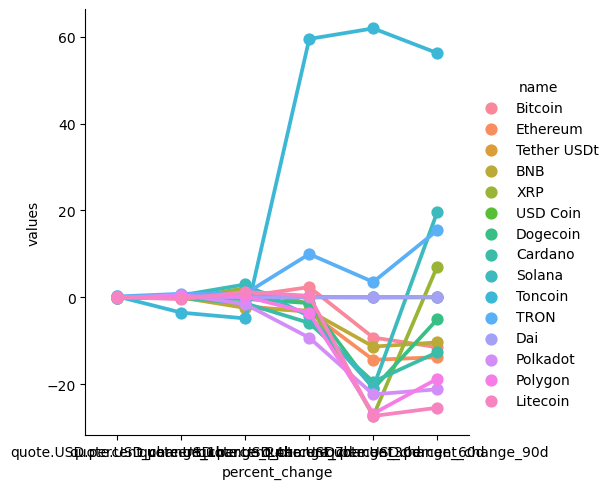

In [20]:
sns.catplot(x='percent_change', y='values', hue='name', data=df7, kind='point')

In [22]:
df7['percent_change']=df7['percent_change'].replace(['quote.USD.percent_change_1h','quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d'],['1h','24h','7d','30d','60d','90d'])
df7

,name,percent_change,values
0,Bitcoin,1h,0.00240
1,Bitcoin,24h,-0.02666
2,Bitcoin,7d,0.24880
3,Bitcoin,30d,2.37371
4,Bitcoin,60d,-9.23793
...,...,...,...
85,Litecoin,24h,-0.38352
86,Litecoin,7d,1.25719
87,Litecoin,30d,0.36251
88,Litecoin,60d,-27.28293


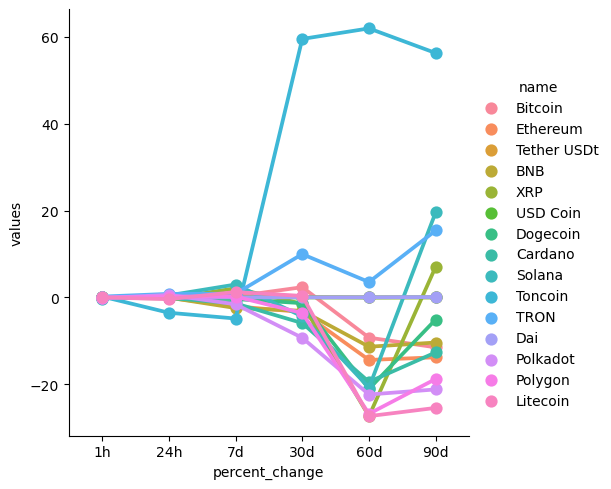

In [23]:
sns.catplot(x='percent_change', y='values', hue='name', data=df7, kind='point')

#### This is to create a dataframe with the columns I wanted

In [24]:
df10 = df[['name','quote.USD.price','timestamp']]
df10 = df10.query("name=='Bitcoin'")
df10

,name,quote.USD.price,timestamp
0,Bitcoin,26580.38723,2023-09-24 18:17:43.576370


<Axes: xlabel='timestamp', ylabel='quote.USD.price'>

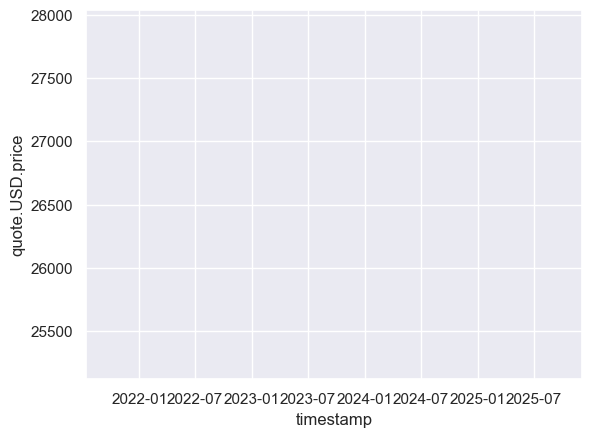

In [25]:
sns.set_theme(style='darkgrid')

sns.lineplot(x='timestamp', y ='quote.USD.price', data = df10)